# Домашняя работа №7.

* Написать модель Random Forest на датасет больных сердечными болезнями (можно почистить от выбросов).

In [1]:
import pandas as pd

In [2]:
url = "http://yustiks.ru/dataset/cardio_train.csv"
data = pd.read_csv(url,sep=";")
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


Данный датасет разобран в начале лекции 7. 

Модель Random Forest при обучении дает такой метод как feature importance, используя его, можно оценить, какой параметр **максимально** влияет на болезнь.

* Сделать вывод о том, какой атрибут оказывает значительное влияение на наличие или отсутствие болезни.

Основная задача: определить, что влияет на сердечную болезнь больше всего. Например, выдвигая гипотезу о том, что тот кто курит, болеет чаще, мы сравниваем курящих пациентов с некурящими, и определяя насколько статистически значимы выборки, делаем вывод, что одна выборка статистически отличима от другой (или неотличима).
    Выдвигаем гипотезу на самый важный атрибут, полученный из feature_importance (Random_Forest). И оцениваем гипотезу. И делаем вывод.

In [3]:
# Создадим датасет с отдельными столбцами для каждого класса (как было в лекции)

data_class = data
data_class['healthy'] = data_class['cardio'].apply(lambda x: 1 if x == 0 else 0)
data_class['ill'] = data_class['cardio'].apply(lambda x: 1 if x == 1 else 0)

# Посмотрим на количество здоровых и больных пациентов

print(f'Количество здоровых пациентов: {len(data_class.healthy[data_class.healthy == 1])}')
print(f'Количество больных пациентов: {len(data_class.ill[data_class.ill == 1])}')

Количество здоровых пациентов: 35021
Количество больных пациентов: 34979


In [4]:
# Составим датасет только из атрибутов без колонки класса

data_x = data_class.iloc[:,1:12]
data_x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [5]:
# Выделим наименования столбцов в отдельный список

headers = list(data_x.columns.values)

In [6]:
# Нормализуем параметры

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
np_scaled = min_max_scaler.fit_transform(data_x)
data_x_norm = pd.DataFrame(np_scaled)
data_x_norm.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.176152,1.0,0.158974,-0.452632,-0.967842,-0.972900,-1.0,-1.0,-1.0,-1.0,1.0
1,0.460317,-1.0,0.035897,-0.210526,-0.964131,-0.971093,1.0,-1.0,-1.0,-1.0,1.0
2,0.248006,-1.0,0.128205,-0.431579,-0.965368,-0.974706,1.0,-1.0,-1.0,-1.0,-1.0
3,0.056911,1.0,0.169231,-0.242105,-0.962894,-0.969286,-1.0,-1.0,-1.0,-1.0,1.0
4,0.033837,-1.0,0.035897,-0.515789,-0.969079,-0.976513,-1.0,-1.0,-1.0,-1.0,-1.0


In [7]:
# Восстановим наименования столбцов, которые стерлись при нормализации

data_x_norm.columns = headers
data_x_norm.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.176152,1.0,0.158974,-0.452632,-0.967842,-0.972900,-1.0,-1.0,-1.0,-1.0,1.0
1,0.460317,-1.0,0.035897,-0.210526,-0.964131,-0.971093,1.0,-1.0,-1.0,-1.0,1.0
2,0.248006,-1.0,0.128205,-0.431579,-0.965368,-0.974706,1.0,-1.0,-1.0,-1.0,-1.0
3,0.056911,1.0,0.169231,-0.242105,-0.962894,-0.969286,-1.0,-1.0,-1.0,-1.0,1.0
4,0.033837,-1.0,0.035897,-0.515789,-0.969079,-0.976513,-1.0,-1.0,-1.0,-1.0,-1.0


In [8]:
# Отделим атрибуты (х) от классов (у)

input_x = data_x_norm
# input_x = data_class.iloc[:,:12]
output_y = data_class.iloc[:,13:]

In [9]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
targets=(output_y.iloc[:,:]==1).idxmax(1)
Y=le.fit_transform(targets)
print(targets.value_counts())

healthy    35021
ill        34979
dtype: int64


In [10]:
# Разделим данные на 70% тренировочных и на 30% тестовых

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    input_x,
    Y,
    test_size = 0.3
)

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Создадим модель Random Forest и выберем 100 деревьев в качестве параметра

model=RandomForestClassifier(n_estimators=100)

# Обучаем модель

model.fit(X_train, y_train)

RandomForestClassifier()

No handles with labels found to put in legend.


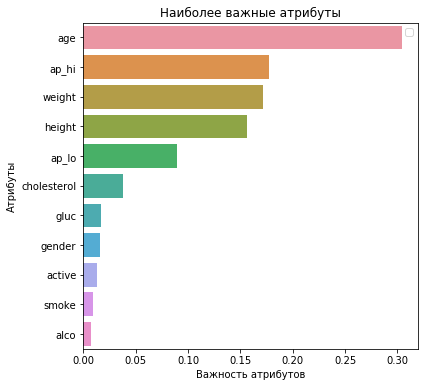

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# С помощью feature_importances_ оценим, какой параметр максимально влияет на болезнь

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

**По графику видим, что наибольшее влияние на появление заболевания оказывает возраст.  
Если брать только те атрибуты, которые можно категоризировать как 0/1 или 1/2/3, то на первом месте находится холестерин.**

In [45]:
# from sklearn.metrics import classification_report

# # Посчитаем качество модели с помощью classification report

# model_pred = model.predict(X_test)
# print(classification_report(y_test, model_pred))
# model.score(X_test, y_test)

In [38]:
import researchpy as rp
from scipy import stats

# Разделим холестерин по показателям 1, 2 и 3. Отдельно попарно просуммируем оставшиеся по холестерину данные.

chol_1 = data[data.cholesterol==1].cardio
chol_2 = data[data.cholesterol==2].cardio
chol_3 = data[data.cholesterol==3].cardio
chol_23 = data[data.cholesterol!=1].cardio
chol_13 = data[data.cholesterol!=2].cardio
chol_12 = data[data.cholesterol!=3].cardio

In [42]:
# Проверим гипотезу о том, что люди с показателем cholesterol = 1 болеют чаще

descriptives, results = rp.ttest(chol_1, chol_23)
print(descriptives)
print('______________________________________________')
print(results)
print('______________________________________________')
print(stats.ttest_ind(chol_1, chol_23))

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0    cardio  52385.0  0.440107  0.496405  0.002169   0.435856  0.444358
1    cardio  17615.0  0.676923  0.467665  0.003524   0.670016  0.683830
2  combined  70000.0  0.499700  0.500003  0.001890   0.495996  0.503404
______________________________________________
                Independent t-test     results
0  Difference (cardio - cardio) =      -0.2368
1            Degrees of freedom =   69998.0000
2                             t =     -55.5653
3         Two side test p value =       0.0000
4        Difference < 0 p value =       0.0000
5        Difference > 0 p value =       1.0000
6                     Cohen's d =      -0.4840
7                     Hedge's g =      -0.4840
8                 Glass's delta =      -0.4771
9                             r =       0.2055
______________________________________________
Ttest_indResult(statistic=-55.56532021096747, pvalue=0.0)


In [43]:
# Проверим гипотезу о том, что люди с показателем cholesterol = 2 болеют чаще

descriptives, results = rp.ttest(chol_2, chol_13)
print(descriptives)
print('______________________________________________')
print(results)
print('______________________________________________')
print(stats.ttest_ind(chol_2, chol_13))

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0    cardio   9549.0  0.602157  0.489478  0.005009   0.592339  0.611976
1    cardio  60451.0  0.483516  0.499732  0.002033   0.479532  0.487499
2  combined  70000.0  0.499700  0.500003  0.001890   0.495996  0.503404
______________________________________________
                Independent t-test     results
0  Difference (cardio - cardio) =       0.1186
1            Degrees of freedom =   69998.0000
2                             t =      21.6191
3         Two side test p value =       0.0000
4        Difference < 0 p value =       1.0000
5        Difference > 0 p value =       0.0000
6                     Cohen's d =       0.2381
7                     Hedge's g =       0.2381
8                 Glass's delta =       0.2424
9                             r =       0.0814
______________________________________________
Ttest_indResult(statistic=21.619123191535245, pvalue=2.5898307558677926e-103)


In [44]:
# Проверим гипотезу о том, что люди с показателем cholesterol = 3 болеют чаще

descriptives, results = rp.ttest(chol_3, chol_12)
print(descriptives)
print('______________________________________________')
print(results)
print('______________________________________________')
print(stats.ttest_ind(chol_3, chol_12))

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0    cardio   8066.0  0.765435  0.423753  0.004718   0.756186  0.774684
1    cardio  61934.0  0.465092  0.498784  0.002004   0.461164  0.469020
2  combined  70000.0  0.499700  0.500003  0.001890   0.495996  0.503404
______________________________________________
                Independent t-test     results
0  Difference (cardio - cardio) =       0.3003
1            Degrees of freedom =   69998.0000
2                             t =      51.7041
3         Two side test p value =       0.0000
4        Difference < 0 p value =       1.0000
5        Difference > 0 p value =       0.0000
6                     Cohen's d =       0.6120
7                     Hedge's g =       0.6120
8                 Glass's delta =       0.7088
9                             r =       0.1918
______________________________________________
Ttest_indResult(statistic=51.7041199975472, pvalue=0.0)


По результатам расчетов (если я правильно понимаю) можно сказать, что наиболее верной является гипотеза о том, что чаще болеют люди с показателем холестерина 2.